In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', None)

In [3]:
# ************* Misc. *************
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from prettytable import PrettyTable

# ************* Plotting *************
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# ************* Data Manipulation *************
from sklearn.preprocessing import LabelEncoder # For encoding Target

ModuleNotFoundError: No module named 'prettytable'

# 1. Data Analysis
Load and go through the **dataset**

In [ ]:
df = pd.read_csv("/kaggle/input/weather-type-classification/weather_classification_data.csv")

df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


# 1.1 Data type of each Feature

In [ ]:
table = PrettyTable()
table.field_names = ['Feature', 'Data Type']

for column in df.columns:
    column_dtype = str(df[column].dtype)
    table.add_row([column, column_dtype])

print(table)

+----------------------+-----------+
|       Feature        | Data Type |
+----------------------+-----------+
|     Temperature      |  float64  |
|       Humidity       |   int64   |
|      Wind Speed      |  float64  |
|  Precipitation (%)   |  float64  |
|     Cloud Cover      |   object  |
| Atmospheric Pressure |  float64  |
|       UV Index       |   int64   |
|        Season        |   object  |
|   Visibility (km)    |  float64  |
|       Location       |   object  |
|     Weather Type     |   object  |
+----------------------+-----------+


# 1.2 Missing Values

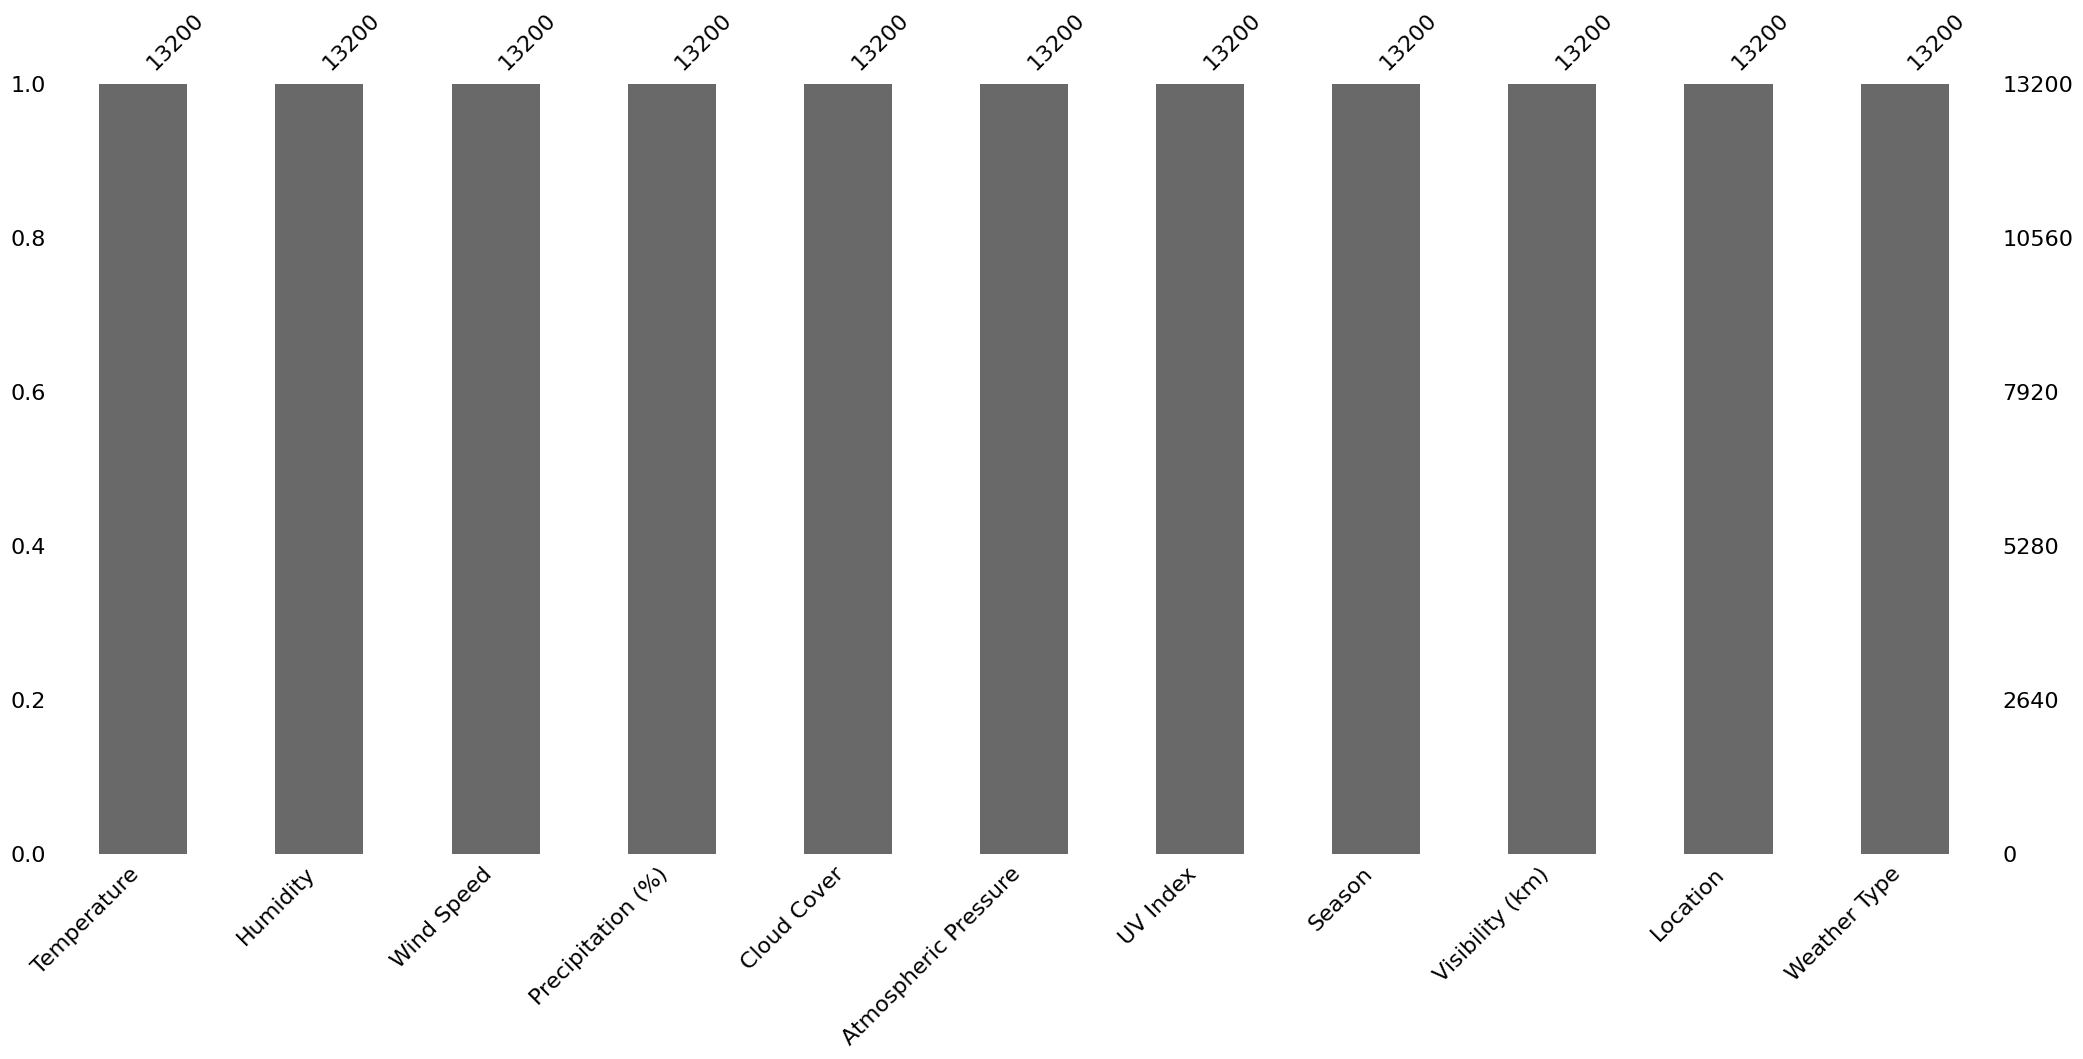

In [ ]:
msno.bar(df)

plt.show()

# 2. Data Visualization
Time to play around with the data

# 2.1 Distribution of Target across all columns

In [ ]:
def distribution_of_target(target, dataframe):
    cat_cols = [feature 
                for feature in dataframe.columns 
                if (dataframe[feature].dtype != 'O' and dataframe[feature].nunique() <100) 
                or (dataframe[feature].dtype == 'O' and feature not in [target])
                ]

    for column in cat_cols:
        contingency_table = pd.crosstab(dataframe[column], dataframe[target], normalize='index')
        contingency_table.plot(kind="bar", stacked=True, figsize=(20, 4))

        plt.title(f"Distribution of {target} across {column}")
        plt.xlabel(column)
        plt.ylabel("Percentage")
        plt.legend(title=target)

        plt.show()

distribution_of_target("Season", df)

NameError: name 'df' is not defined

# 2.2 Correlation Matrix

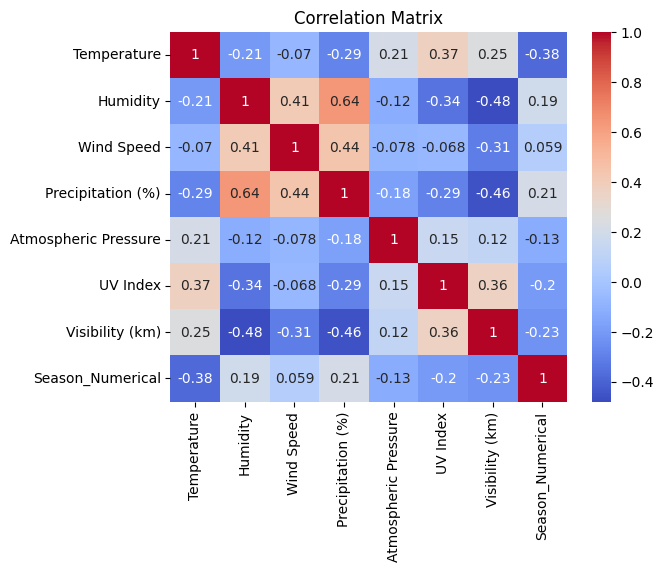

In [ ]:
label_encoder = LabelEncoder()
df["Season_Numerical"] = label_encoder.fit_transform(df["Season"]) # Add a column that represents target in numerical format

numerical_df = df.select_dtypes(include=["int", "float"])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

# 2.3 Data Relationships (Cute way of saying Correlation Analysis)

# 2.3.1 Change of Humidity depending on Precipitation 

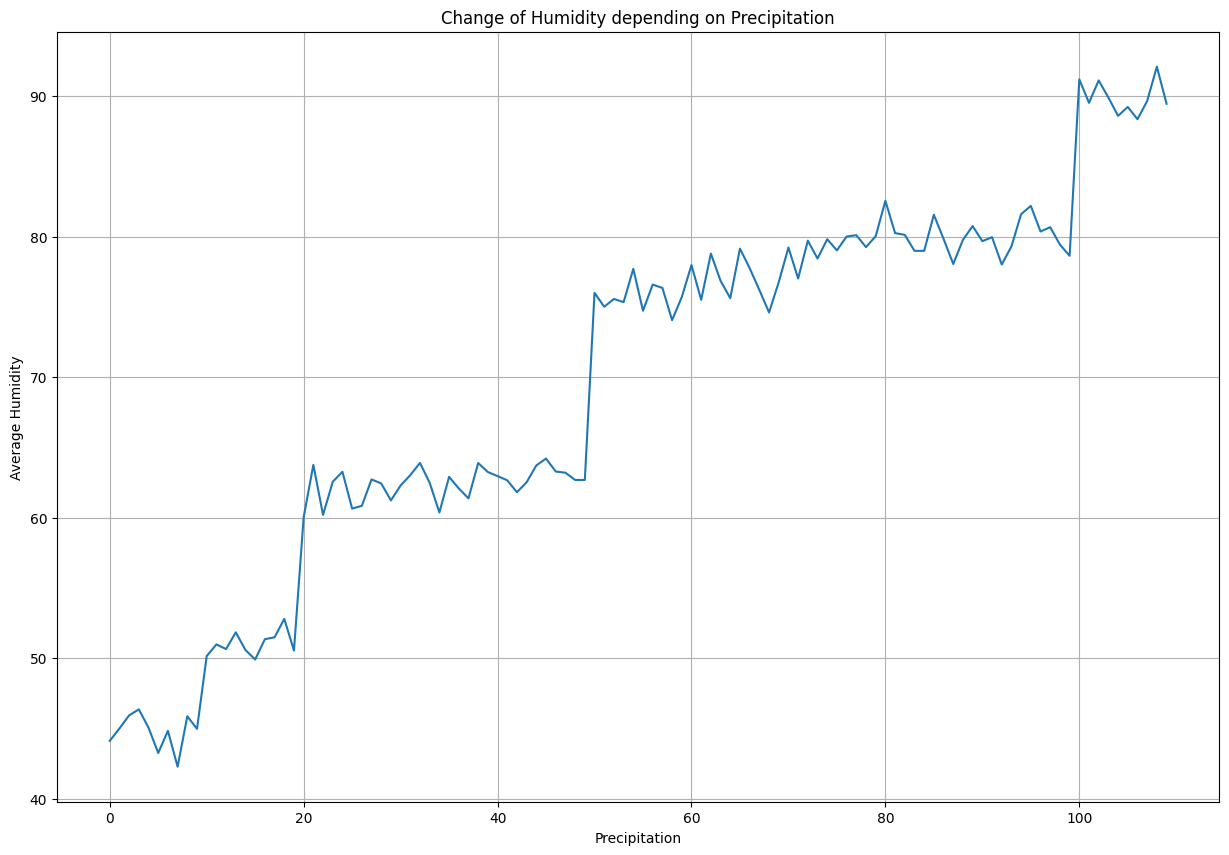

In [ ]:
plt.figure(figsize=(15, 10))

precipitation_on_humidity = df.groupby("Precipitation (%)")["Humidity"].mean()

precipitation_on_humidity.plot(kind="line")

plt.title('Change of Humidity depending on Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Average Humidity')
plt.grid(True)

plt.show()

# 2.3.2 Change of Temperature depending on UV Index

<Figure size 1500x1000 with 0 Axes>

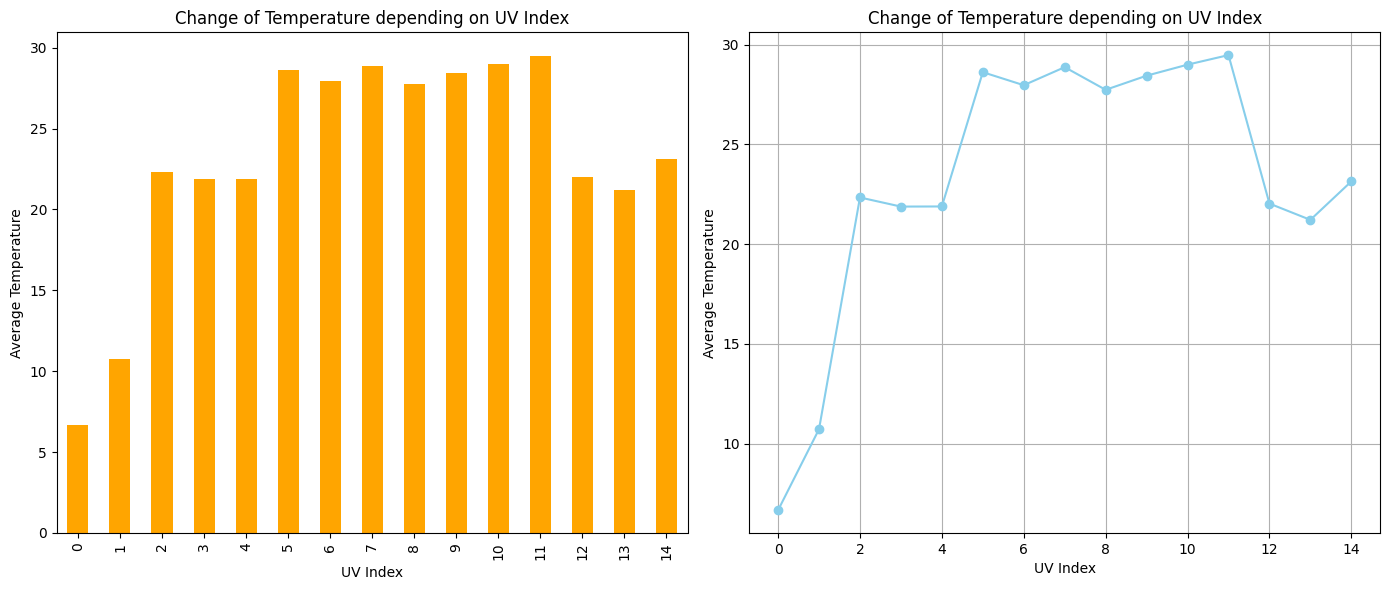

In [ ]:
plt.figure(figsize=(15, 10))

temperature_on_uv = df.groupby("UV Index")["Temperature"].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar Chart
temperature_on_uv.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Change of Temperature depending on UV Index')
axes[0].set_xlabel('UV Index')
axes[0].set_ylabel('Average Temperature')

# Line Chart
temperature_on_uv.plot(kind='line', ax=axes[1], color='skyblue', marker='o')
axes[1].set_title('Change of Temperature depending on UV Index')
axes[1].set_xlabel('UV Index')
axes[1].set_ylabel('Average Temperature')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 2.3.3 Change of Wind Speed depending on Humidity

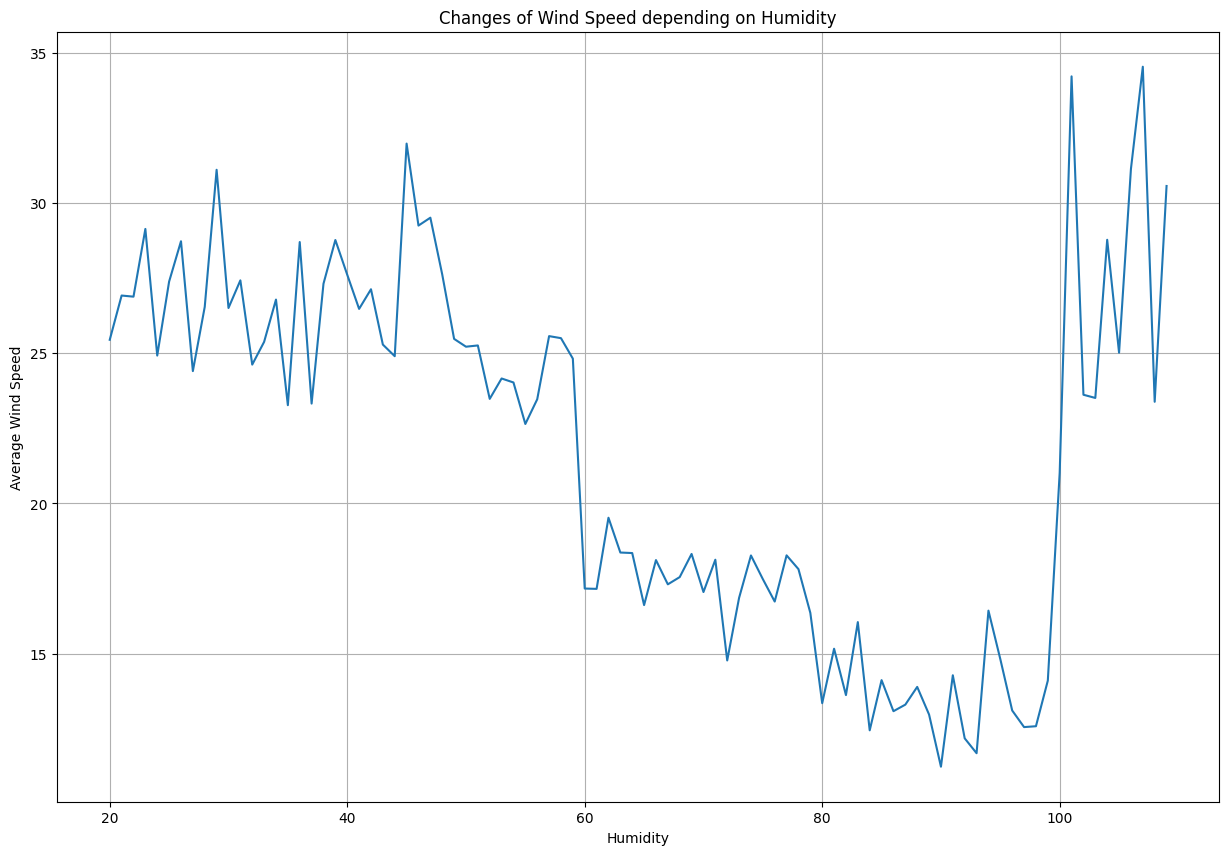

In [ ]:
plt.figure(figsize=(15, 10))

wind_on_humidity = df.groupby("Humidity")["Temperature"].mean()

wind_on_humidity.plot(kind="line")

plt.title('Changes of Wind Speed depending on Humidity')
plt.xlabel('Humidity')
plt.ylabel('Average Wind Speed')
plt.grid(True)

plt.show()

# 2.3.4 Change of Visibility depending on Humidity

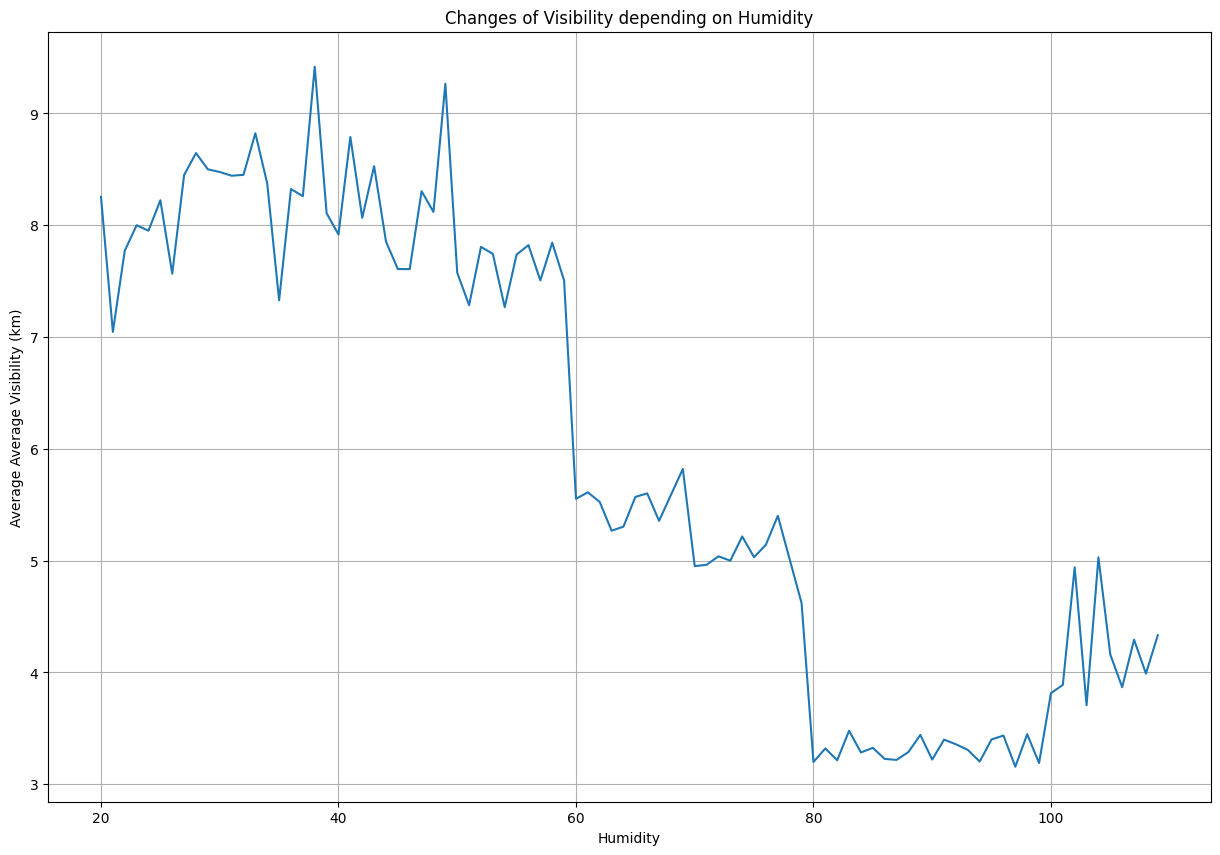

In [ ]:
plt.figure(figsize=(15, 10))

visibility_on_humidity = df.groupby("Humidity")["Visibility (km)"].mean()

visibility_on_humidity.plot(kind="line")

plt.title('Changes of Visibility depending on Humidity')
plt.xlabel('Humidity')
plt.ylabel('Average Average Visibility (km)')
plt.grid(True)

plt.show()

# 2.4 Distribution of Weather Type over all Columns

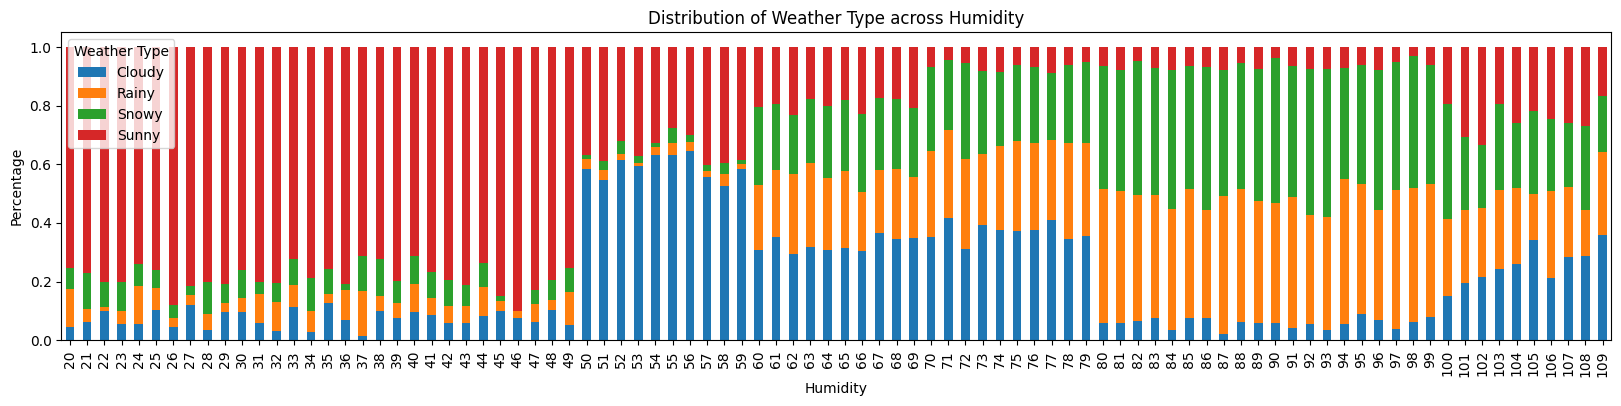

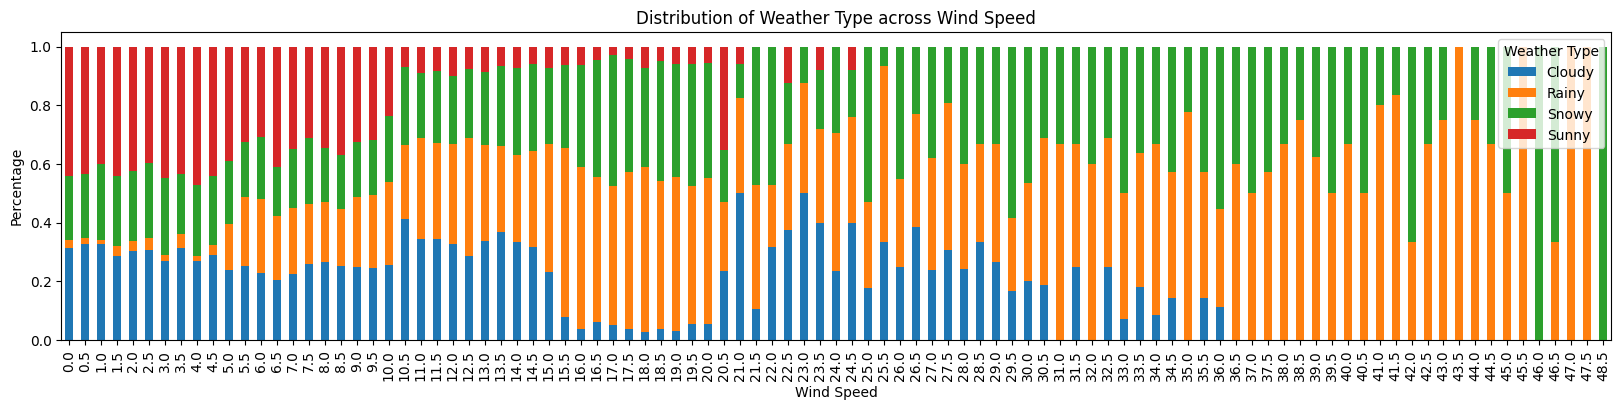

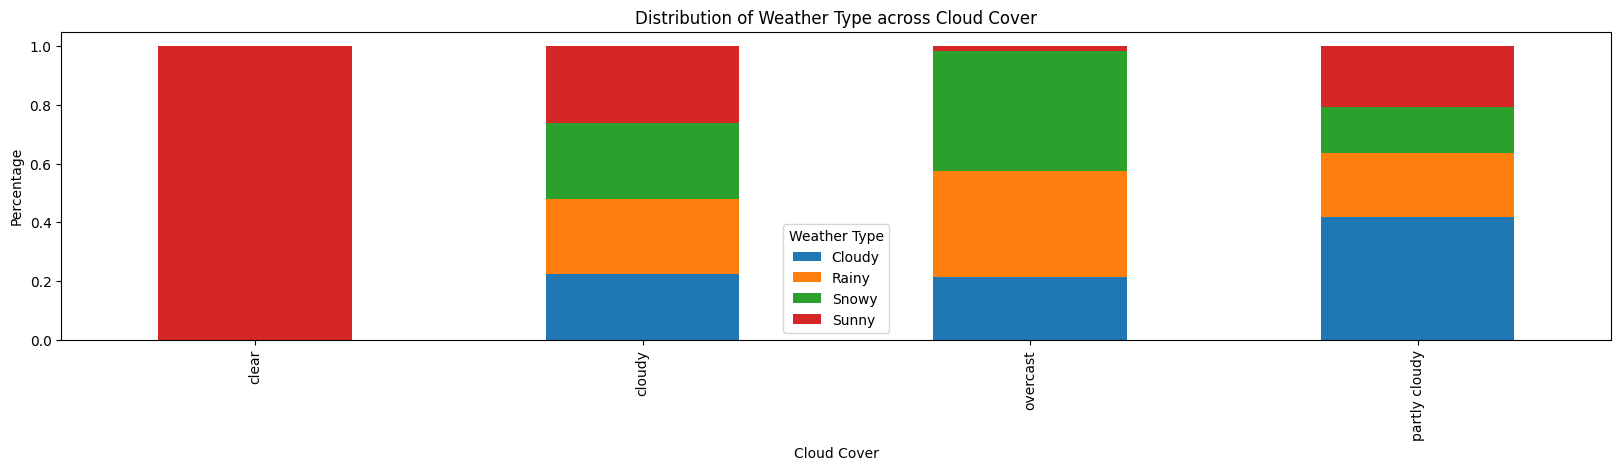

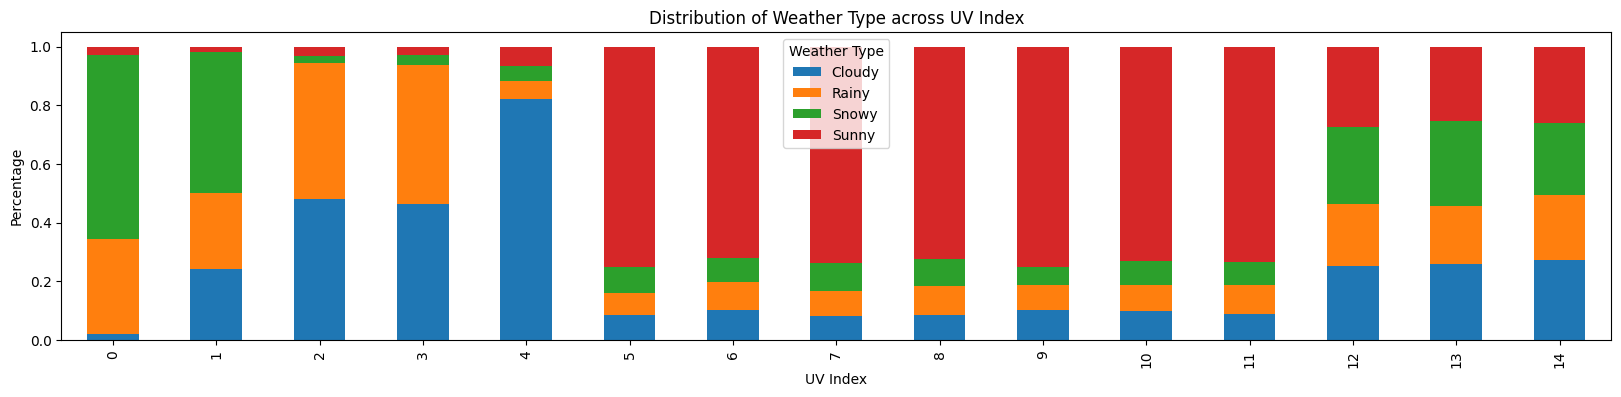

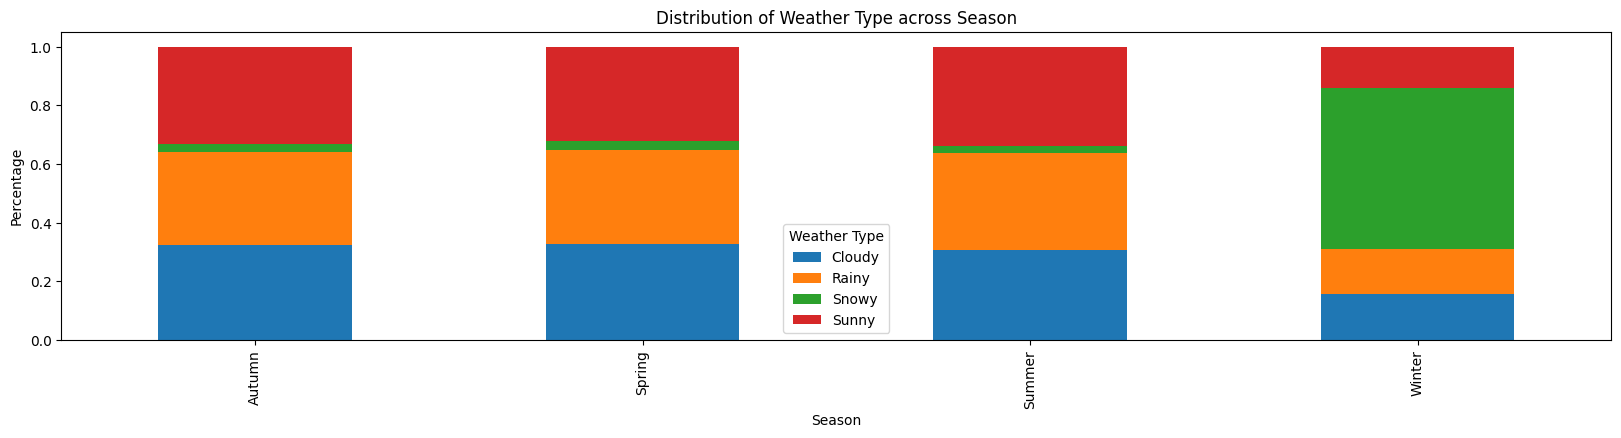

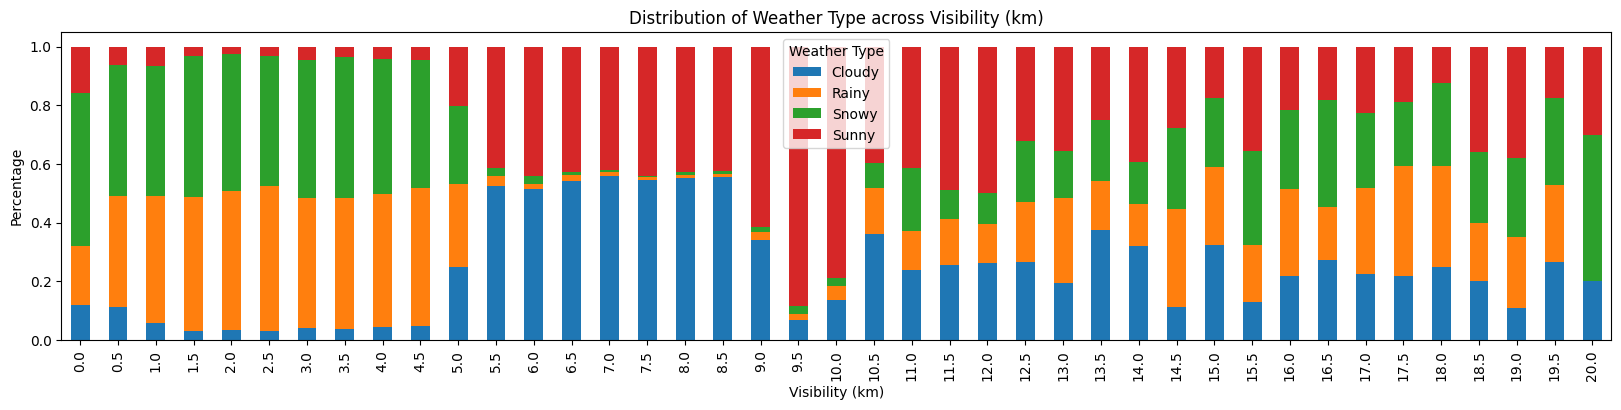

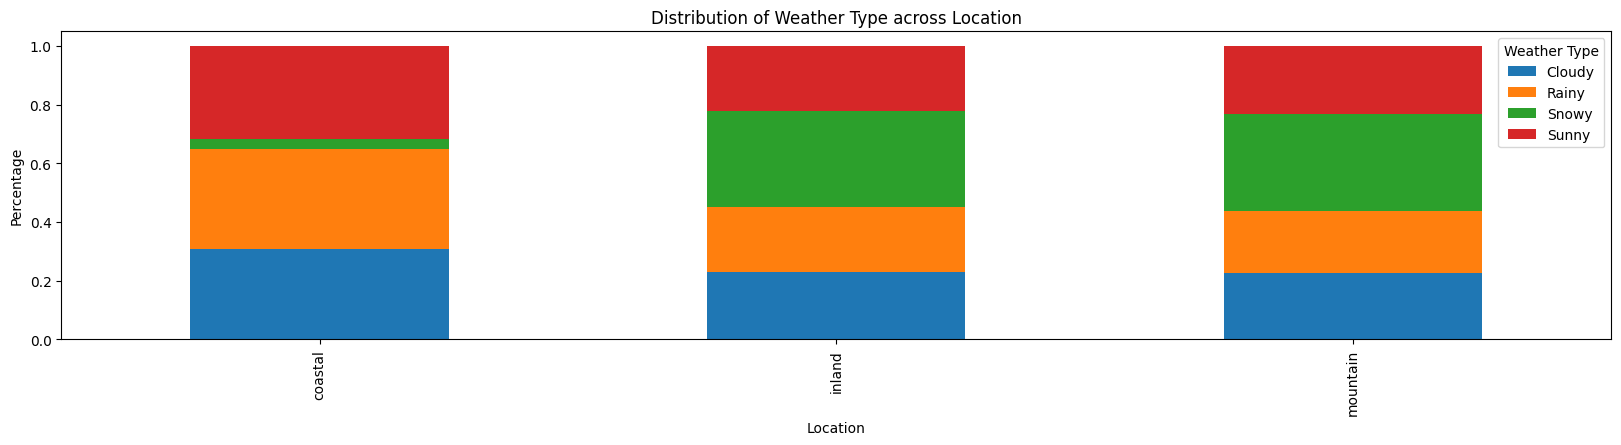

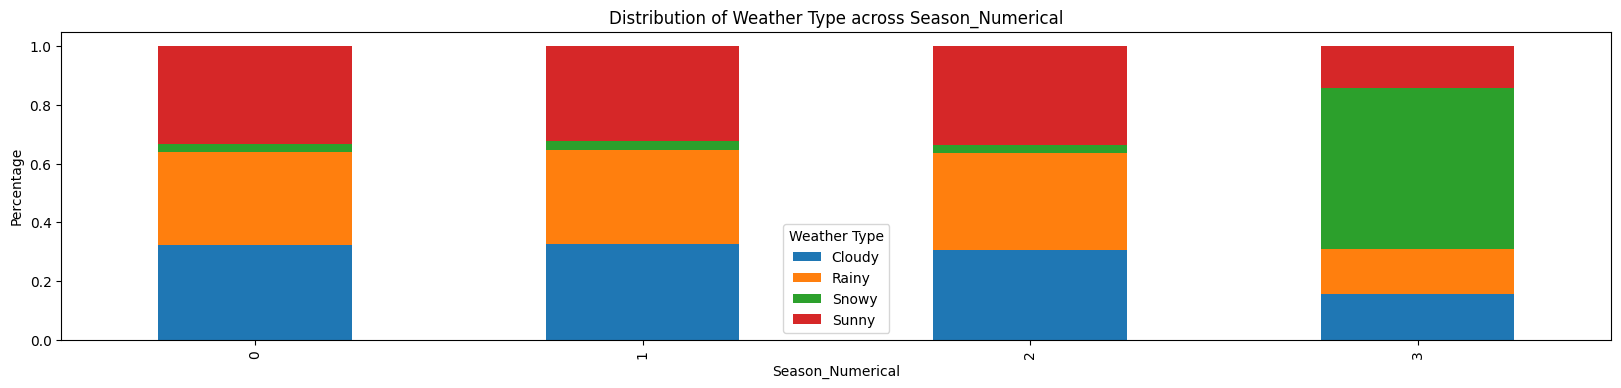

In [ ]:
distribution_of_target("Weather Type", df)

# 2.5 Distribution of Cloud Cover over all Columns 

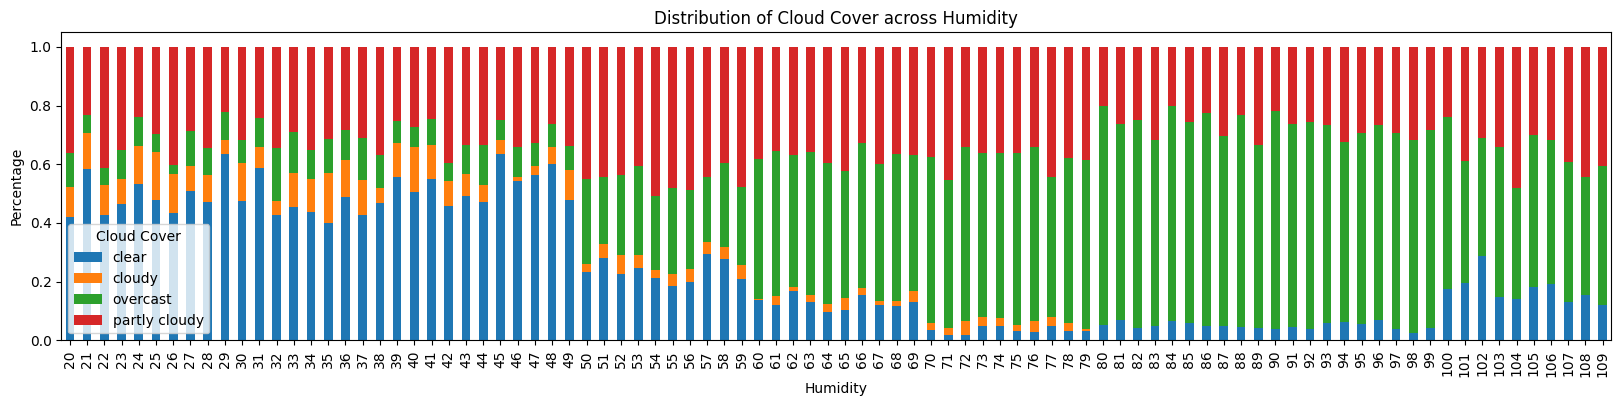

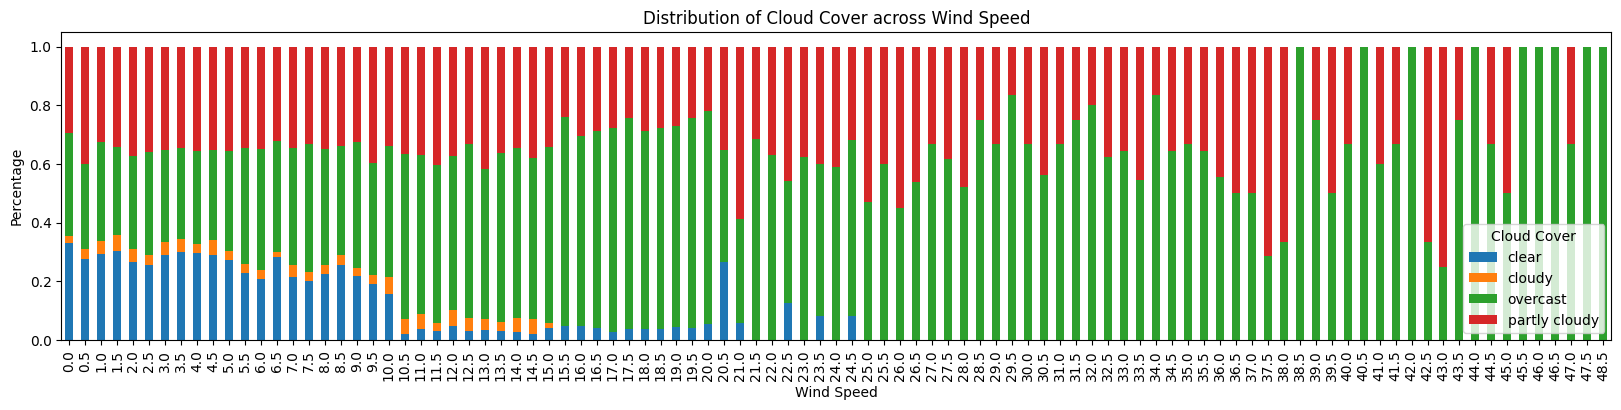

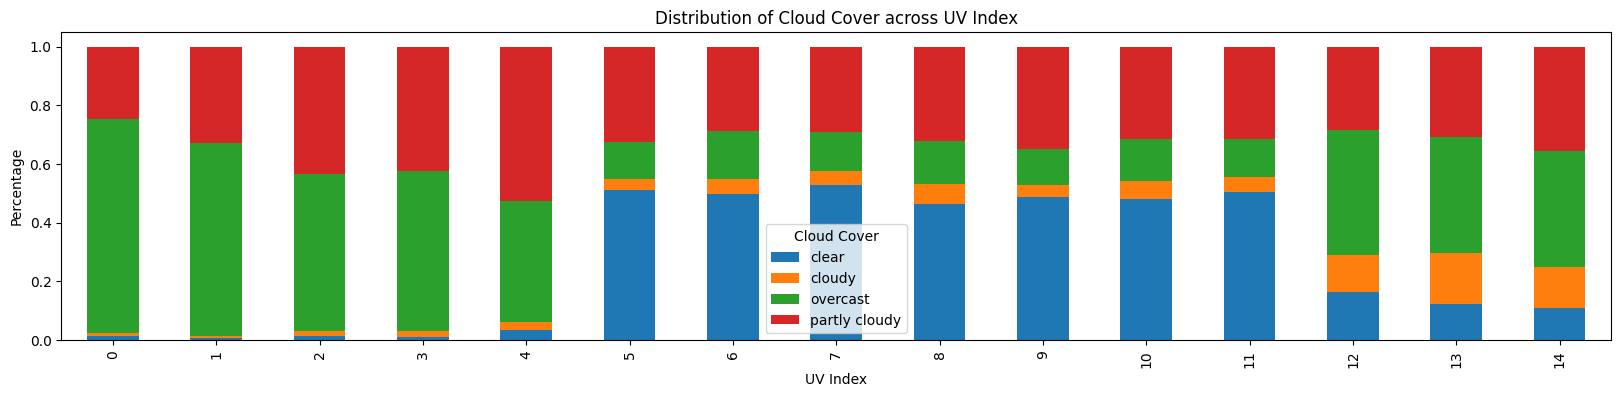

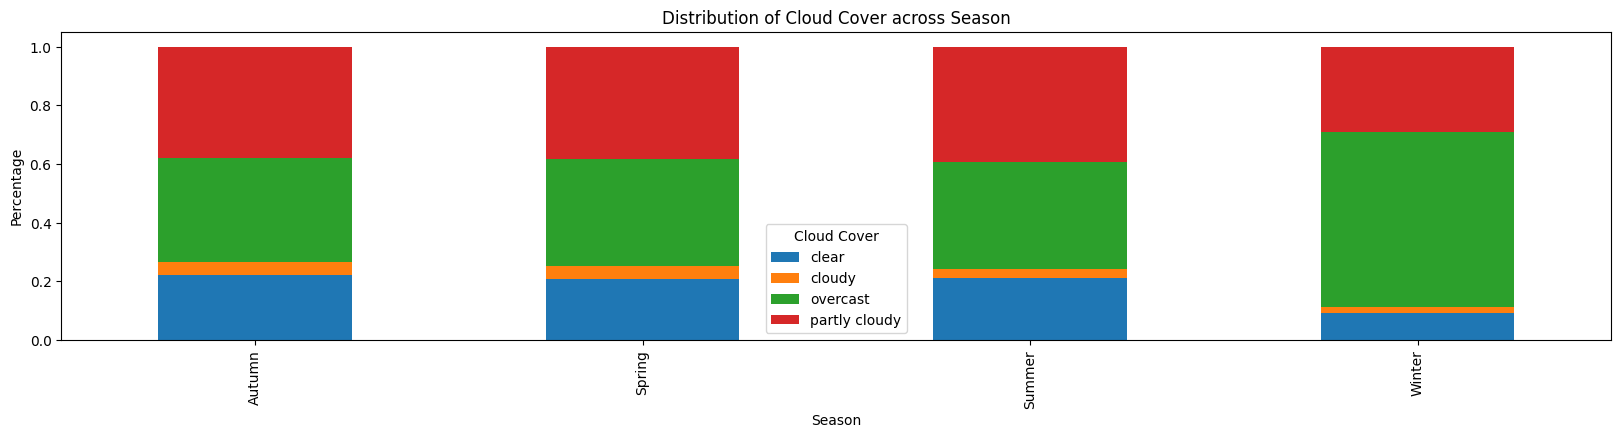

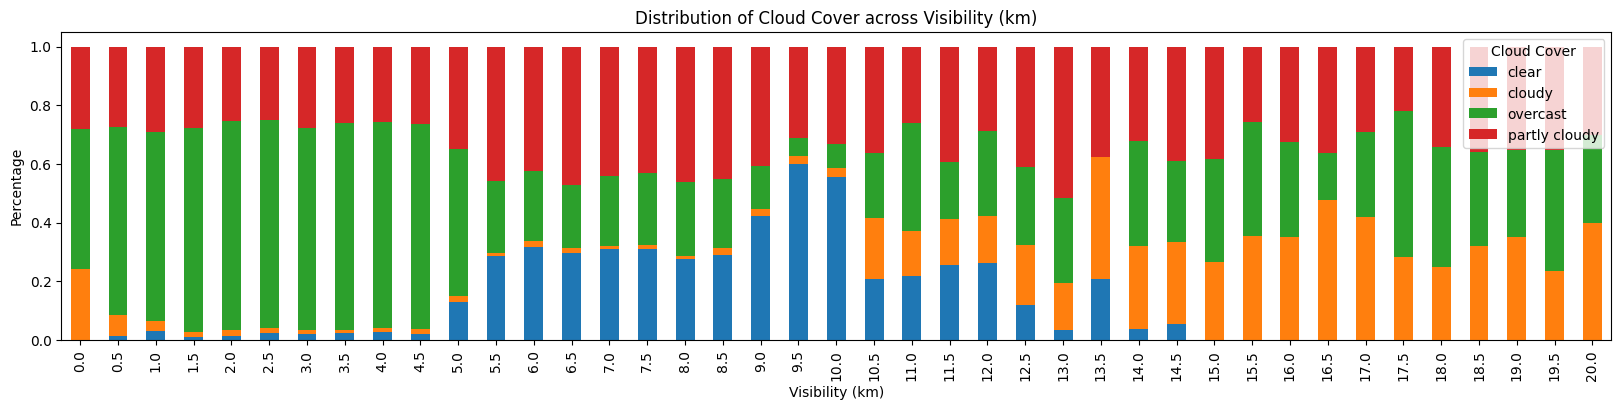

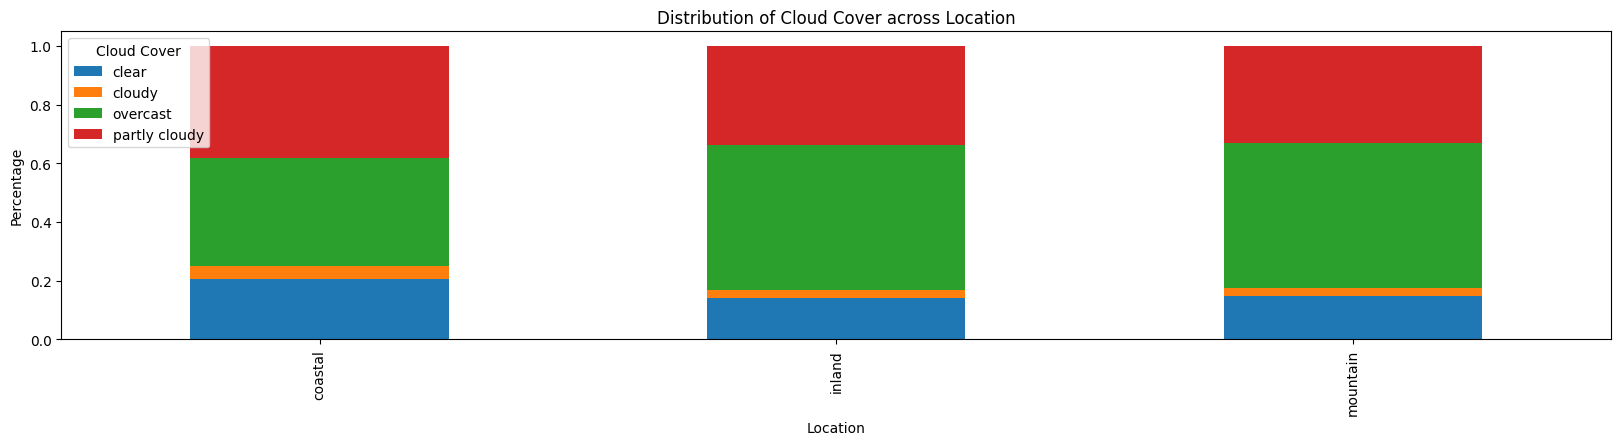

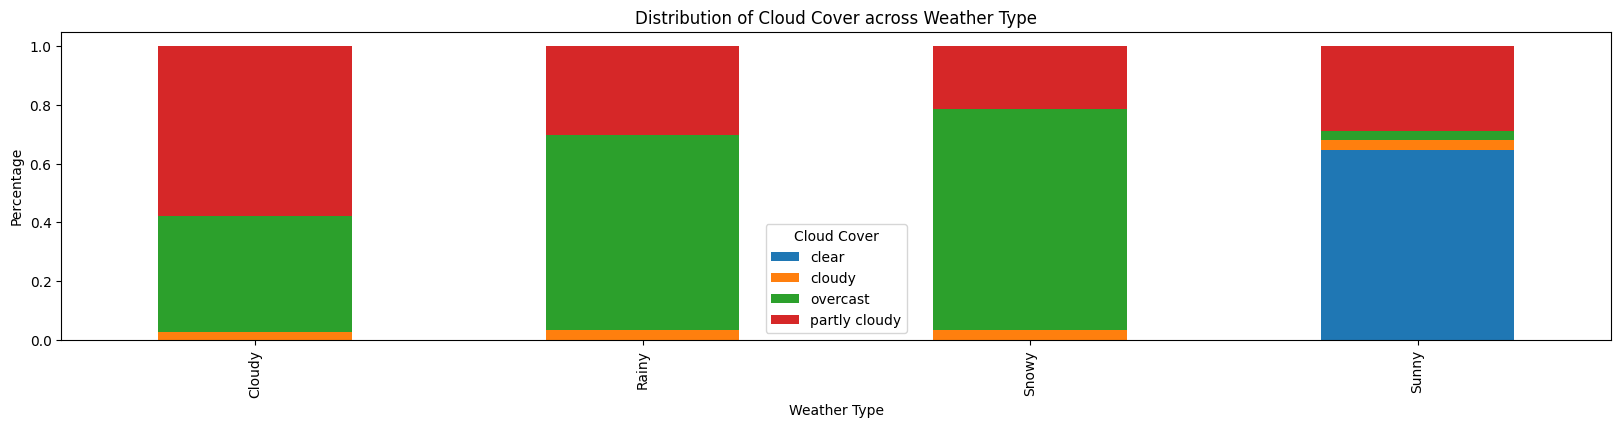

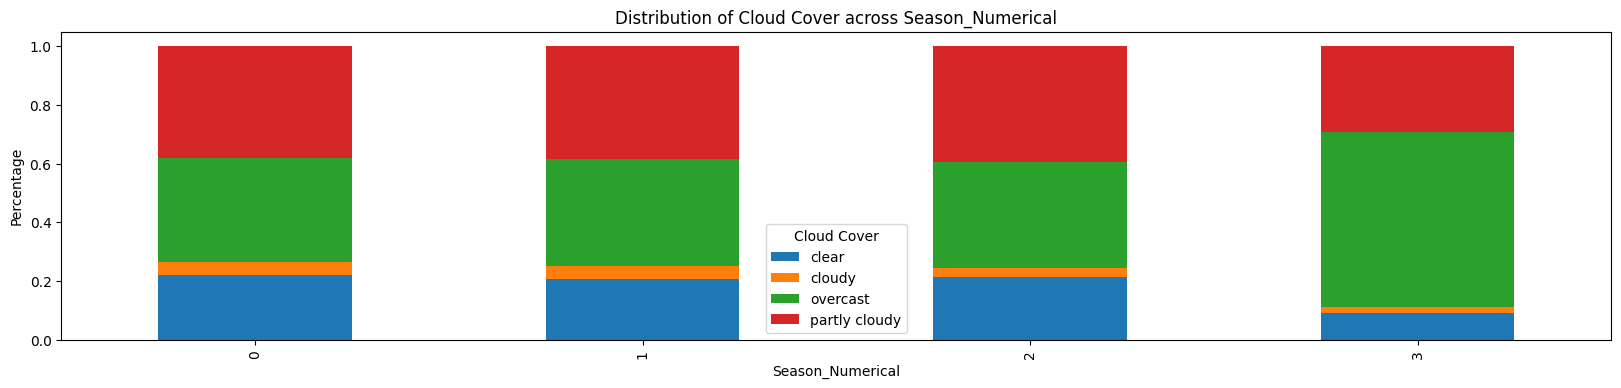

In [ ]:
distribution_of_target("Cloud Cover", df)